In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
raw = pd.read_csv("PLS_FY2014_AE_pupld14a.csv")

## Original Data

In [48]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9305 entries, 0 to 9304
Columns: 159 entries, STABR to YR_SUB
dtypes: float64(9), int64(62), object(88)
memory usage: 11.3+ MB


In [134]:
#variables to use in the model
to_use = ['TOTCIR', 'POPU_LSA', 'STGVT', 'GEOCODE', 'OBEREG', 'LOCALE']
to_use_df = raw[to_use]
to_use_df.head()

,TOTCIR,POPU_LSA,STGVT,GEOCODE,OBEREG,LOCALE
0,11607,2059,18993,CI1,8,43
1,1886620,300549,56724,MA1,8,11
2,1092,209,6300,CI1,8,43
3,12347,6241,6600,CI1,8,33
4,59630,12793,6600,CO1,8,42


In [135]:
to_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9305 entries, 0 to 9304
Data columns (total 6 columns):
TOTCIR      9305 non-null int64
POPU_LSA    9305 non-null int64
STGVT       9305 non-null int64
GEOCODE     9305 non-null object
OBEREG      9305 non-null int64
LOCALE      9305 non-null object
dtypes: int64(4), object(2)
memory usage: 436.2+ KB


In [136]:
to_use_df.describe()
# -3 and -1 are missing

,TOTCIR,POPU_LSA,STGVT,OBEREG
count,9.305000e+03,9.305000e+03,9.305000e+03,9305.000000
mean,2.487170e+05,3.434550e+04,9.140340e+04,3.726384
std,1.027975e+06,1.365817e+05,8.202488e+05,1.978533
min,-3.000000e+00,-3.000000e+00,-3.000000e+00,1.000000
25%,1.146800e+04,2.190000e+03,2.020000e+02,2.000000
50%,4.099700e+04,7.284000e+03,4.042000e+03,3.000000
75%,1.432910e+05,2.280800e+04,2.142900e+04,5.000000
max,2.410174e+07,4.008651e+06,3.561788e+07,9.000000


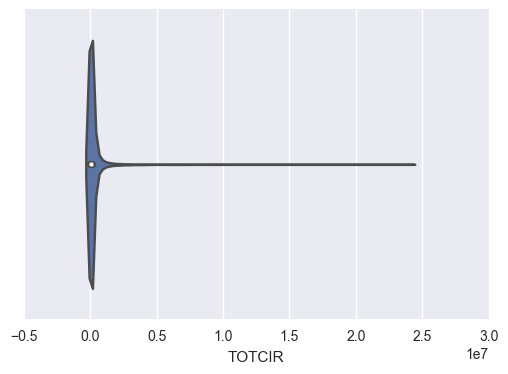

In [137]:
sns.violinplot(to_use_df['TOTCIR'])

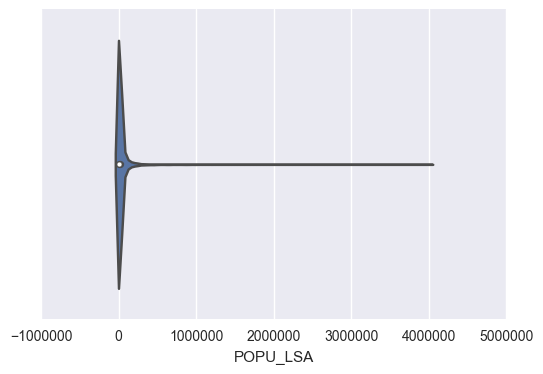

In [138]:
sns.violinplot(to_use_df['POPU_LSA'])

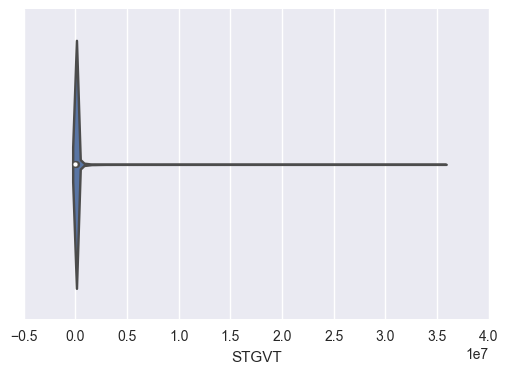

In [139]:
sns.violinplot(to_use_df['STGVT'])

In [140]:
to_use_df['GEOCODE'].value_counts()

CI1    3357
OTH    2150
CI2    1494
CO1    1129
CO2     508
SD1     423
MC1     129
SD2      52
MC2      42
MA1      11
MA2      10
Name: GEOCODE, dtype: int64

In [141]:
to_use_df['OBEREG'].value_counts()

3    1883
4    1620
2    1553
1    1288
5    1162
6     859
8     483
7     395
9      62
Name: OBEREG, dtype: int64

In [142]:
to_use_df['LOCALE'].value_counts()
#period is missing

42    2041
21    1881
43    1613
32    1057
33     647
41     505
31     502
13     296
22     258
23     206
12     117
.      106
11      76
Name: LOCALE, dtype: int64

In [143]:
to_use_df.corr()

,TOTCIR,POPU_LSA,STGVT,OBEREG
TOTCIR,1.000000,0.792547,0.518021,0.097316
POPU_LSA,0.792547,1.000000,0.426361,0.130130
STGVT,0.518021,0.426361,1.000000,-0.011859
OBEREG,0.097316,0.130130,-0.011859,1.000000


## Impute Missing Data

In [144]:
temp_median = to_use_df['TOTCIR'].median()
to_use_df['TOTCIR'] = to_use_df['TOTCIR'].replace(to_replace=-3.0, value=temp_median)
to_use_df['TOTCIR'] = to_use_df['TOTCIR'].replace(to_replace=-1.0, value=temp_median)
to_use_df['TOTCIR'] = to_use_df['TOTCIR'].replace(to_replace=0.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [145]:
temp_median = to_use_df['POPU_LSA'].median()
to_use_df['POPU_LSA'] = to_use_df['POPU_LSA'].replace(to_replace=-3.0, value=temp_median)
to_use_df['POPU_LSA'] = to_use_df['POPU_LSA'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [146]:
temp_median = to_use_df['STGVT'].median()
to_use_df['STGVT'] = to_use_df['STGVT'].replace(to_replace=-3.0, value=temp_median)
to_use_df['STGVT'] = to_use_df['STGVT'].replace(to_replace=-1.0, value=temp_median)
to_use_df['STGVT'] = to_use_df['STGVT'].replace(to_replace=0.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [147]:
to_use_df.describe()

,TOTCIR,POPU_LSA,STGVT,OBEREG
count,9.305000e+03,9.305000e+03,9.305000e+03,9305.000000
mean,2.489726e+05,3.435333e+04,9.237688e+04,3.726384
std,1.027918e+06,1.365800e+05,8.201422e+05,1.978533
min,1.700000e+01,1.000000e+01,1.000000e+01,1.000000
25%,1.193700e+04,2.201000e+03,3.910000e+03,2.000000
50%,4.099700e+04,7.284000e+03,4.042000e+03,3.000000
75%,1.432910e+05,2.280800e+04,2.142900e+04,5.000000
max,2.410174e+07,4.008651e+06,3.561788e+07,9.000000


In [148]:
temp_mode = to_use_df['LOCALE'].mode()
print temp_mode

0    42
dtype: object


In [149]:
to_use_df['LOCALE'] = to_use_df['LOCALE'].replace(to_replace='.', value=42).astype(int)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [150]:
to_use_df['LOCALE'].value_counts()

42    2147
21    1881
43    1613
32    1057
33     647
41     505
31     502
13     296
22     258
23     206
12     117
11      76
Name: LOCALE, dtype: int64

## Transform continuous variables

In [151]:
log_columns = ['TOTCIR', 'POPU_LSA', 'STGVT']
log_df = to_use_df.copy()
log_df[log_columns] = log_df[log_columns].apply(np.log10)

In [152]:
log_df.head()

,TOTCIR,POPU_LSA,STGVT,GEOCODE,OBEREG,LOCALE
0,4.064720,3.313656,4.278594,CI1,8,43
1,6.275684,5.477915,4.753767,MA1,8,11
2,3.038223,2.320146,3.799341,CI1,8,43
3,4.091561,3.795254,3.819544,CI1,8,33
4,4.775465,4.106972,3.819544,CO1,8,42


In [153]:
log_df.describe()

,TOTCIR,POPU_LSA,STGVT,OBEREG,LOCALE
count,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000
mean,4.618093,3.869884,3.930347,3.726384,32.990650
std,0.811753,0.729308,0.764932,1.978533,9.835499
min,1.230449,1.000000,1.000000,1.000000,11.000000
25%,4.076895,3.342620,3.592177,2.000000,21.000000
50%,4.612752,3.862370,3.606596,3.000000,33.000000
75%,5.156219,4.358087,4.331002,5.000000,42.000000
max,7.382048,6.602998,7.551668,9.000000,43.000000


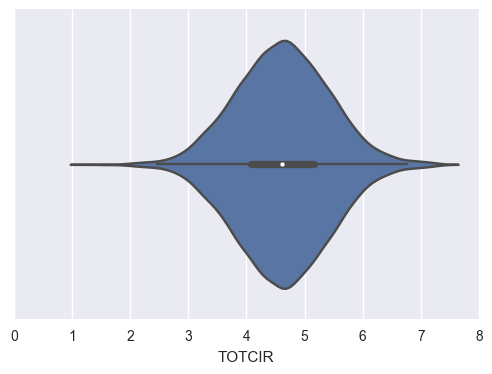

In [154]:
sns.violinplot(log_df['TOTCIR'])

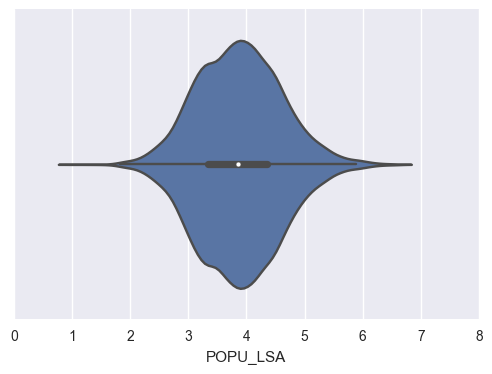

In [155]:
sns.violinplot(log_df['POPU_LSA'])

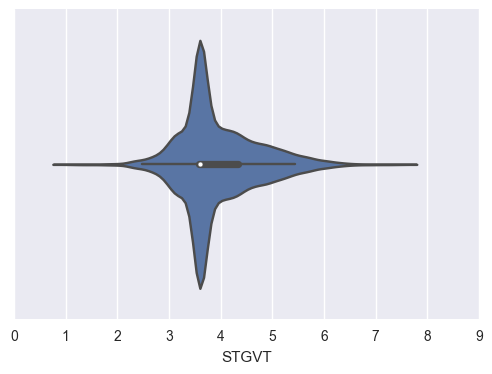

In [156]:
sns.violinplot(log_df['STGVT'])

## Get Dummy Variables

In [157]:
dummy_df = pd.get_dummies(log_df, columns=['GEOCODE', 'OBEREG', 'LOCALE'], drop_first=True)

In [158]:
dummy_df.head()

,TOTCIR,POPU_LSA,STGVT,GEOCODE_CI2,GEOCODE_CO1,GEOCODE_CO2,GEOCODE_MA1,GEOCODE_MA2,GEOCODE_MC1,GEOCODE_MC2,...,LOCALE_13,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41,LOCALE_42,LOCALE_43
0,4.064720,3.313656,4.278594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.275684,5.477915,4.753767,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.038223,2.320146,3.799341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.091561,3.795254,3.819544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.775465,4.106972,3.819544,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [159]:
#correlation matrix
dummy_df.corr()

,TOTCIR,POPU_LSA,STGVT,GEOCODE_CI2,GEOCODE_CO1,GEOCODE_CO2,GEOCODE_MA1,GEOCODE_MA2,GEOCODE_MC1,GEOCODE_MC2,...,LOCALE_13,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41,LOCALE_42,LOCALE_43
TOTCIR,1.000000,0.862533,0.575790,-0.137112,0.211502,0.044927,0.032813,0.024527,0.109065,0.068634,...,0.216686,0.359039,0.096474,0.035195,0.052943,0.078049,0.043717,-0.051656,-0.317084,-0.383898
POPU_LSA,0.862533,1.000000,0.617840,-0.182728,0.289273,0.129429,0.033883,0.037792,0.167042,0.091472,...,0.228467,0.335654,0.104531,0.052298,0.052111,0.102664,0.060149,-0.052099,-0.308466,-0.429378
STGVT,0.575790,0.617840,1.000000,-0.272251,0.268306,0.034237,0.008896,0.012739,0.221807,0.072577,...,0.141803,0.215778,0.035355,0.035931,0.020933,0.087127,-0.011330,-0.049168,-0.180719,-0.239618
GEOCODE_CI2,-0.137112,-0.182728,-0.272251,1.000000,-0.162517,-0.105096,-0.015046,-0.014345,-0.051855,-0.029449,...,-0.009217,-0.139959,-0.020368,-0.008108,-0.011144,-0.003423,0.000136,-0.028533,0.112062,0.082758
GEOCODE_CO1,0.211502,0.289273,0.268306,-0.162517,1.000000,-0.089298,-0.012784,-0.012189,-0.044060,-0.025022,...,0.026417,-0.100173,0.001396,-0.024595,-0.030462,0.105543,0.110635,-0.058509,-0.047266,0.030685
GEOCODE_CO2,0.044927,0.129429,0.034237,-0.105096,-0.089298,1.000000,-0.008267,-0.007882,-0.028493,-0.016181,...,-0.000431,-0.051464,0.034327,0.008853,0.030557,0.040688,0.012419,-0.011630,-0.033924,0.006172
GEOCODE_MA1,0.032813,0.033883,0.008896,-0.015046,-0.012784,-0.008267,1.000000,-0.001128,-0.004079,-0.002317,...,0.011585,0.006046,-0.005810,0.016080,-0.008215,0.007397,-0.009405,0.005563,-0.018841,-0.007492
GEOCODE_MA2,0.024527,0.037792,0.012739,-0.014345,-0.012189,-0.007882,-0.001128,1.000000,-0.003889,-0.002209,...,0.031434,0.007992,-0.005539,-0.004935,0.006686,-0.001405,-0.008966,-0.007857,-0.010178,-0.015020
GEOCODE_MC1,0.109065,0.167042,0.221807,-0.051855,-0.044060,-0.028493,-0.004079,-0.003889,1.000000,-0.007984,...,-0.000543,-0.048239,0.002369,-0.017840,-0.020177,0.035762,0.029018,-0.024347,0.024511,-0.000879
GEOCODE_MC2,0.068634,0.091472,0.072577,-0.029449,-0.025022,-0.016181,-0.002317,-0.002209,-0.007984,1.000000,...,0.024336,-0.021918,-0.001607,-0.010132,-0.008983,0.006210,0.006805,-0.001977,0.012592,-0.001188


## Linear Regression

In [160]:
X = dummy_df.drop(['TOTCIR'], axis=1)
y = dummy_df['TOTCIR']

In [161]:
import statsmodels.formula.api as smf

# statsmodel linear regression

lin_model = smf.OLS(endog=y, exog=X)
result = lin_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTCIR   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.639e+04
Date:                Sun, 26 Mar 2017   Prob (F-statistic):               0.00
Time:                        16:09:49   Log-Likelihood:                -4084.6
No. Observations:                9305   AIC:                             8231.
Df Residuals:                    9274   BIC:                             8452.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
POPU_LSA        0.9734      0.008    120.520      0.000         0.958     0.989
STGVT           0.0907      0.007     12.925      0.000         0.077     0.104
GEOCODE_CI2     0.0515      0.012      4.170      0.000         0.027     0.076
GEOCODE_CO1    -0.0782      0.015     -5.081      0.000        -0.108    -0.048
GEOCODE_CO2    -0.1849      0.019     -9.533      0.000        -0.223    -0.147
GEOCODE_MA1     0.2805      0.114      2.458      0.014         0.057     0.504
GEOCODE_MA2    -0.0525      0.120     -0.439      0.661        -0.287     0.182
GEOCODE_MC1    -0.2384      0.036     -6.536      0.000        -0.310    -0.167
GEOCODE_MC2    -0.1664      0.059     -2.811      0.005        -0.282    -0.050
GEOCODE_OTH     0.0286      0.012      2.357      0.018         0.005     0.052
GEOCODE_SD1     0.0794      0.021      3.826      0.000         0.039     0.120
GEOCODE_SD2    -0.1073      0.053     -2.033      0.042        -0.211    -0.004
OBEREG_2        0.0048      0.015      0.310      0.757        -0.026     0.035
OBEREG_3        0.1396      0.014      9.728      0.000         0.112     0.168
OBEREG_4        0.1834      0.015     12.194      0.000         0.154     0.213
OBEREG_5       -0.1121      0.018     -6.287      0.000        -0.147    -0.077
OBEREG_6       -0.0541      0.018     -3.016      0.003        -0.089    -0.019
OBEREG_7        0.2379      0.023     10.366      0.000         0.193     0.283
OBEREG_8        0.1953      0.021      9.379      0.000         0.154     0.236
OBEREG_9       -1.0681      0.050    -21.485      0.000        -1.166    -0.971
LOCALE_12       0.4593      0.047      9.857      0.000         0.368     0.551
LOCALE_13       0.5093      0.036     14.074      0.000         0.438     0.580
LOCALE_21       0.5395      0.029     18.903      0.000         0.484     0.595
LOCALE_22       0.5279      0.035     15.101      0.000         0.459     0.596
LOCALE_23       0.4128      0.037     11.228      0.000         0.341     0.485
LOCALE_31       0.4679      0.030     15.415      0.000         0.408     0.527
LOCALE_32       0.4306      0.028     15.585      0.000         0.376     0.485
LOCALE_33       0.4253      0.029     14.614      0.000         0.368     0.482
LOCALE_41       0.4613      0.029     15.990      0.000         0.405     0.518
LOCALE_42       0.3801      0.024     15.909      0.000         0.333     0.427
LOCALE_43       0.4073      0.024     17.073      0.000         0.360     0.454
==============================================================================
Omnibus:                     2085.628   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8933.249
Skew:                          -1.041   Prob(JB):                         0.00
Kurtosis:                       7.325   Cond. N

In [163]:
from sklearn.cross_validation import train_test_split
dummy_df = dummy_df.astype(float)
X, y = dummy_df.drop(['TOTCIR'], axis=1).values, dummy_df.loc[:, 'TOTCIR'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [164]:
#sklearn linear regression
from sklearn import linear_model, metrics

lm=linear_model.LinearRegression().fit(X_train, y_train)
print lm.score(X_train, y_train)

0.788566477709


In [165]:
lm = linear_model.LinearRegression().fit(X_train, y_train)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'OLS R2:', lm.score(X_train, y_train)

lm = linear_model.Lasso().fit(X_train, y_train)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Lasso R2:', lm.score(X_train, y_train)

lm = linear_model.Ridge().fit(X_train, y_train)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Ridge R2:', lm.score(X_train, y_train)

~~~ OLS ~~~
OLS MSE:  0.138112418661
OLS R2: 0.788566477709
~~~ Lasso ~~~
Lasso MSE:  0.653219116648
Lasso R2: 0.0
~~~ Ridge ~~~
Ridge MSE:  0.138119375806
Ridge R2: 0.788555827156


In [166]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    cv=5,
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas, 'fit_intercept': [True, False]},
    scoring='mean_squared_error')

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [167]:
from pprint import pprint
pprint(gs.grid_scores_ )

[mean: -0.13964, std: 0.00693, params: {'alpha': 1e-10, 'fit_intercept': True},
 mean: -0.14310, std: 0.00746, params: {'alpha': 1e-10, 'fit_intercept': False},
 mean: -0.13964, std: 0.00693, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': True},
 mean: -0.14310, std: 0.00746, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': False},
 mean: -0.13964, std: 0.00693, params: {'alpha': 1e-08, 'fit_intercept': True},
 mean: -0.14310, std: 0.00746, params: {'alpha': 1e-08, 'fit_intercept': False},
 mean: -0.13964, std: 0.00693, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': True},
 mean: -0.14310, std: 0.00746, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': False},
 mean: -0.13964, std: 0.00693, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': True},
 mean: -0.14310, std: 0.00746, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': False},
 mean: -0.13964, std: 0.00693, params: {'alpha': 1.0000000000000001e-05, 'fit_intercept': Tru

In [168]:
print gs.best_score_
print gs.best_estimator_

-0.139599724991
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [169]:
prediction = gs.predict(X_test)

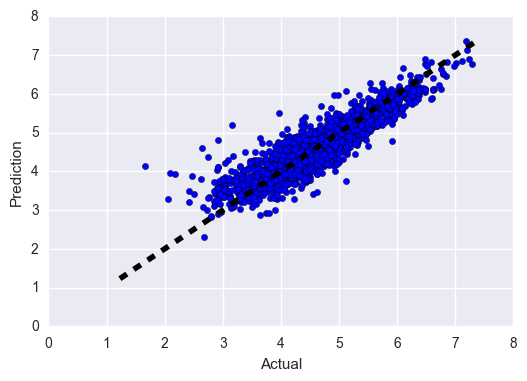

In [170]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')
plt.show()

## Random Forest

In [180]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [181]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring='mean_squared_error')
print('CV MSE {}, Average MSE {}'.format(scores, scores.mean()))

CV MSE [-0.15551281 -0.1654919  -0.15396698], Average MSE -0.158323897535


In [183]:
prediction = model.predict(X_test)

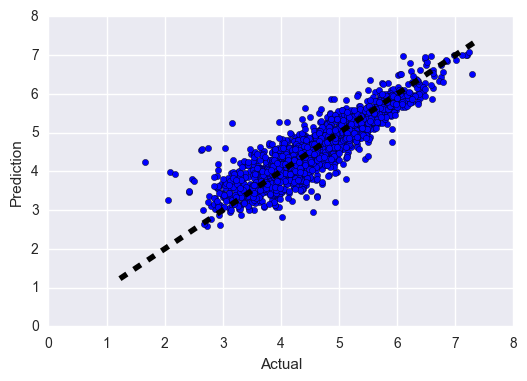

In [184]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')
plt.show()

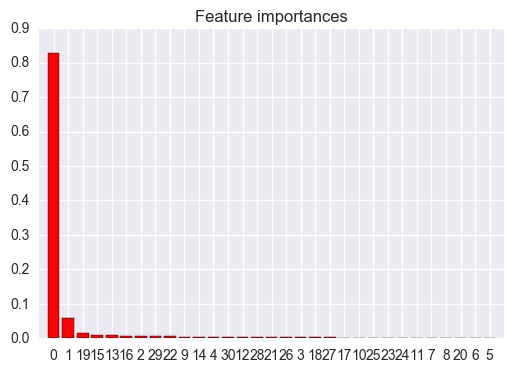

In [185]:
importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [186]:
features = dummy_df.drop(['TOTCIR'], axis =1).columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
0,POPU_LSA,0.829675
1,STGVT,0.058757
19,OBEREG_9,0.014579
15,OBEREG_5,0.009625
13,OBEREG_3,0.008165
